In [4]:
!pip install ucimlrepo

In [5]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

drive.mount('/content/drive')

Mounted at /content/drive


## 1. Describing dataset for classification: [Census Income](https://archive.ics.uci.edu/dataset/2/adult)

Purpose is to predict whether annual income of an individual exceeds $50K/yr based on census data.

### 1.1.Importing dataset from the source

In [6]:
## fetch dataset
#adult = fetch_ucirepo(id=2)
#
## data (as pandas dataframes)
#df = adult.data.features
#y = adult.data.targets
#
## metadata
#print(adult.metadata)
#
## variable information
##print(adult.variables)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab/TUW/ML/ML 0/adult/adult.data',
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                        'marital-status', 'occupation', 'relationship', 'race', 'sex',
                        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                        'class'],
                 index_col=False)

In [8]:
# what does it look like in pandas
# column "class" is the one we have to predict

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [11]:
# getting rid of whitespace in object columns

cols = ['age', 'workclass', 'education',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'native-country', 'class']
df[cols] = df[cols].apply(lambda x: x.astype(str).str.strip())
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
# droping fnlwgt column as we don't know what it means and there is also no description for it in the source
df = df.drop(columns=['fnlwgt'], axis=0)
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
# dataset data types

df.dtypes

,0
age,object
workclass,object
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object
capital-gain,int64


In [14]:
# age also should be int

df['age'] = df['age'].astype(int)

In [15]:
print(
    f"The dataset contains {df.shape[0]} samples and "
    f"{len(df.columns)} columns"
)

The dataset contains 32561 samples and 14 columns


### 1.2 Checking for qnt of missing values

Empty values in this dataset stored with '?' value. Firstly we have to replace it with NaN. So pandas functions would work correctly

In [16]:
df = df.replace({'?': np.nan})
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
df.shape

(32561, 14)

In [20]:
583/32561

0.0179048555019809

In [ ]:
df.isnull().sum()

,0
age,0
workclass,1836
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0
capital-gain,0


### 1.3 Checking the distribution

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'education-num'}>],
       [<Axes: title={'center': 'capital-gain'}>,
        <Axes: title={'center': 'capital-loss'}>],
       [<Axes: title={'center': 'hours-per-week'}>, <Axes: >]],
      dtype=object)

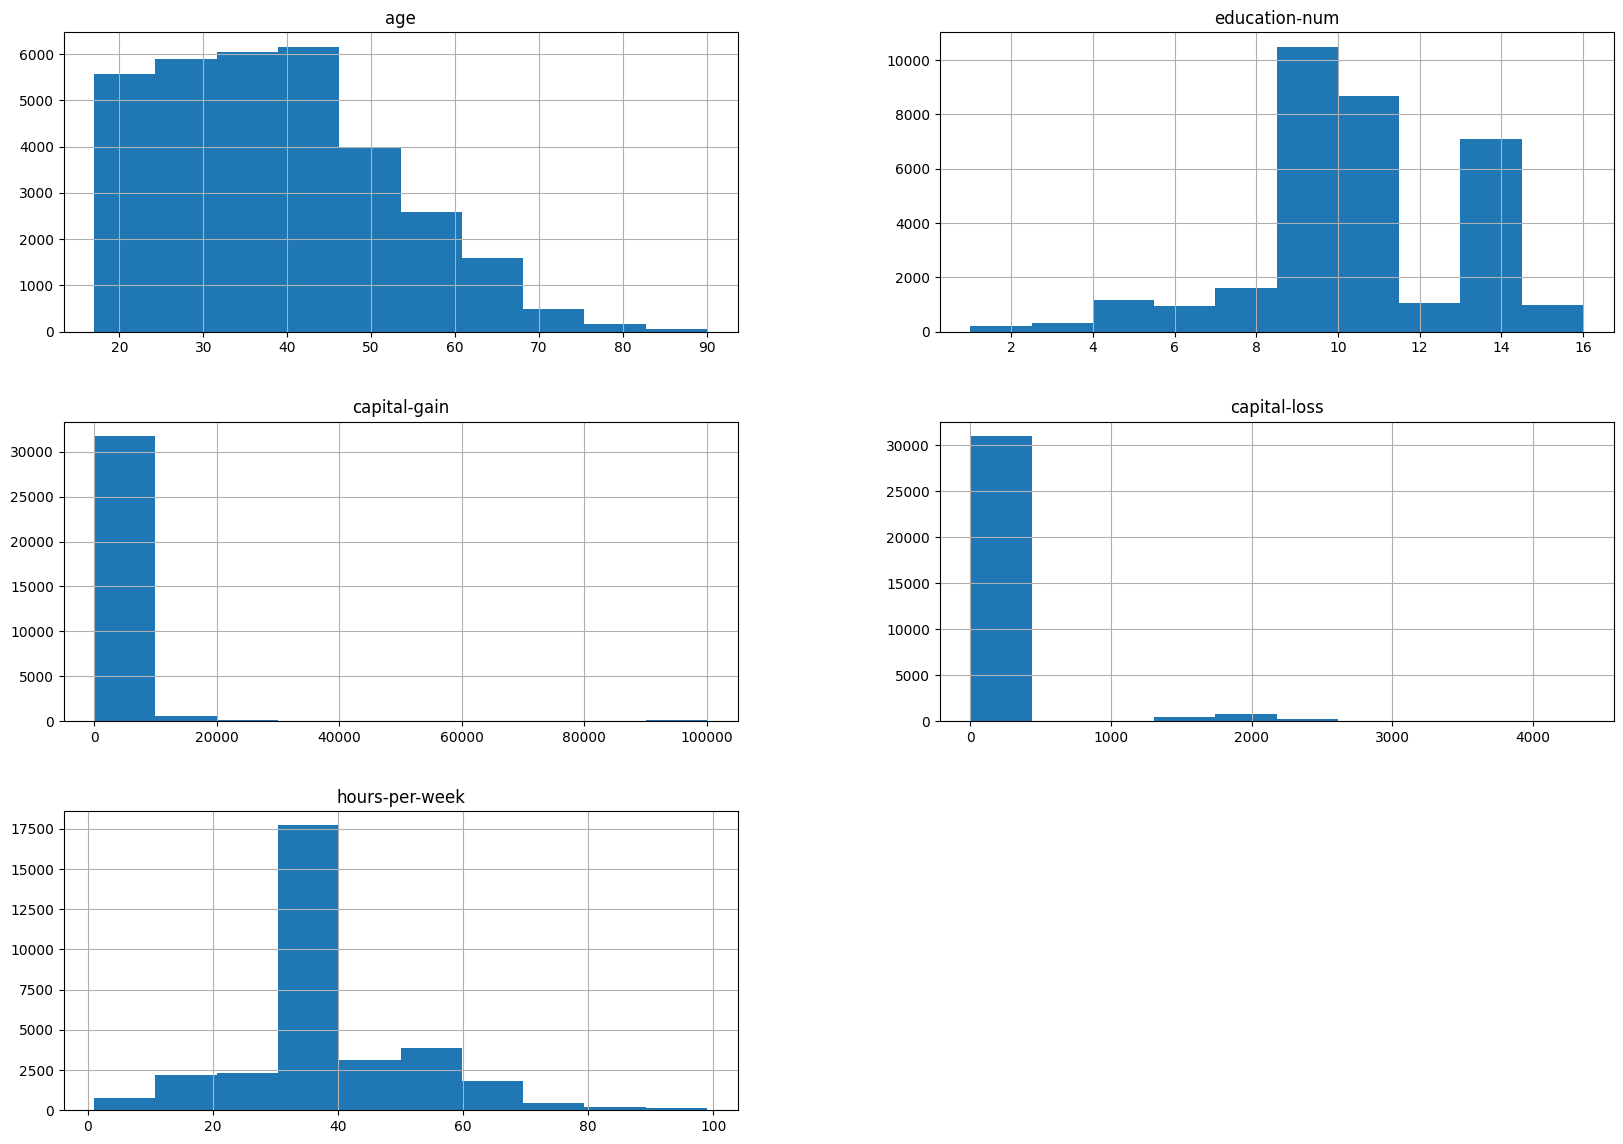

In [ ]:
df.hist(figsize=(20, 14))

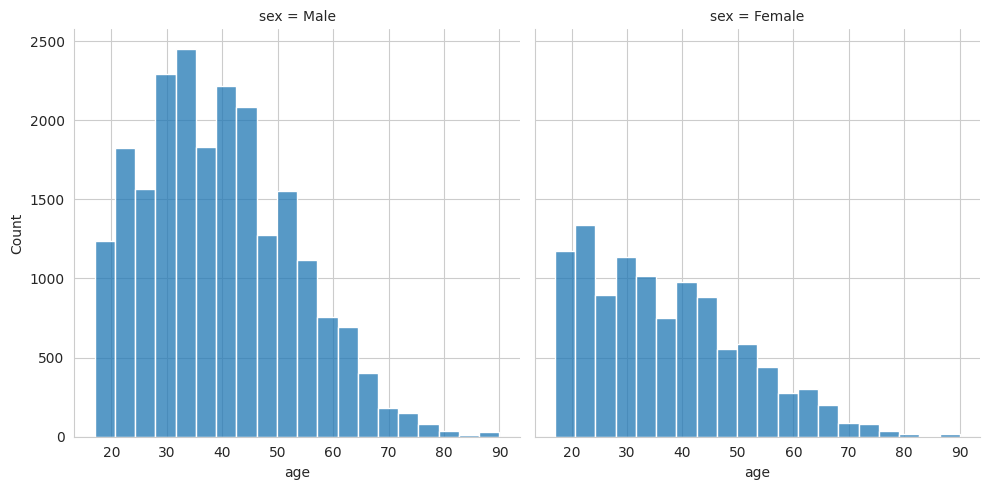

In [ ]:
sns.set_style("whitegrid")
sns.displot(data=df, x="age", col="sex", bins=20)

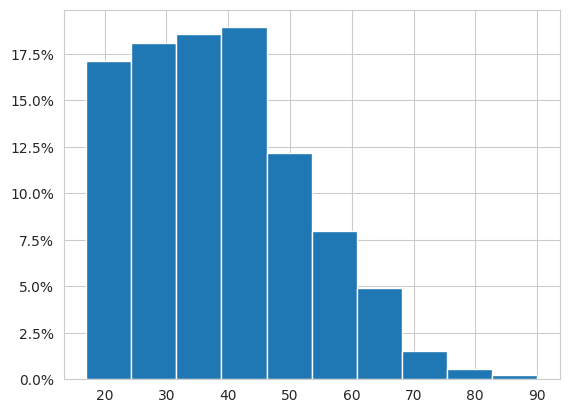

In [ ]:
#create histogram, using percentages instead of counts
plt.hist(df['age'], weights=np.ones(len(df)) / len(df))

#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

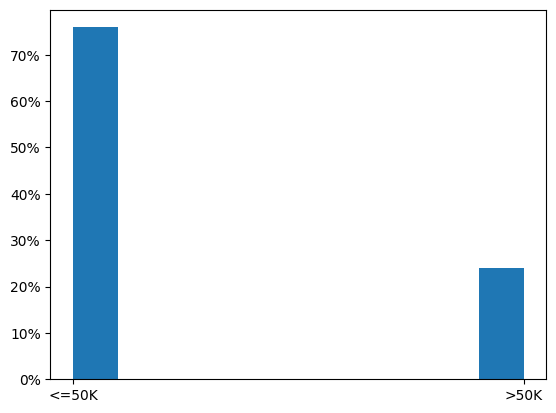

In [25]:
#create histogram, using percentages instead of counts
plt.hist(df['class'], weights=np.ones(len(df)) / len(df))

#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

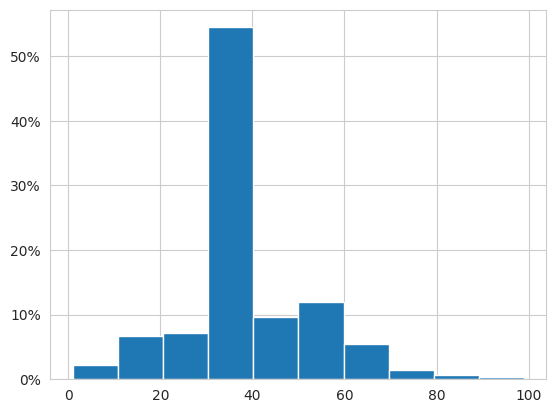

In [ ]:
#create histogram, using percentages instead of counts
plt.hist(df['hours-per-week'], weights=np.ones(len(df)) / len(df))

#apply percentage format to y-axis
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

#### ✅ Notes

Most of the data is about age < 70

* Most of the data is about **age < 70** (less than 1% of observations is below this level)
* **Hours per week** peaks at 40 hours (more than 50% of observations with this value)
* **education-num:** peak at 10 and 13
* Almost **no capital loss**
* **Capital gain** below 20000





In [ ]:
df.workclass.value_counts()

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [ ]:
df.sex.value_counts()

,count
sex,
Male,21790
Female,10771


In [22]:
10771/(21790+10771)

0.33079450876815825

In [ ]:
df.race.value_counts()

,count
race,
White,27816
Black,3124
Asian-Pac-Islander,1039
Amer-Indian-Eskimo,311
Other,271


In [23]:
27816/(27816+3124+1039+311+271)

0.8542735173981143

In [ ]:
sum(df[df['race'] != 'White'].race.value_counts())

4745

In [ ]:
df['native-country'].value_counts()

,count
native-country,
United-States,29170
Mexico,643
Philippines,198
Germany,137
Canada,121
Puerto-Rico,114
El-Salvador,106
India,100
Cuba,95


In [ ]:
sum(df[df['native-country'] != 'United-States'].race.value_counts())

3391

In [24]:
29170/(3391+29170)

0.895857006848684

In [ ]:
df["education"].value_counts()

,count
education,
HS-grad,10501
Some-college,7291
Bachelors,5355
Masters,1723
Assoc-voc,1382
11th,1175
Assoc-acdm,1067
10th,933
7th-8th,646


#### ✅ Notes

We can see **gender** (male/female), **race** (white/not white) and **native-country** (USA/not USA) disbalance